In [10]:
import pandas as pd
import os
import seaborn as sn

In [5]:
filename = 'dataset_SCL.csv'
filepath = os.path.join('..', 'datasets', filename)

Leemos los datos

In [6]:
dataset = pd.read_csv(filepath)

/var/folders/7q/9zlb0wdx18g6v2ltqtd7j_100000gn/T/ipykernel_29457/2671589788.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(filepath)


In [7]:
dataset

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Obtenemos la temporalidad de los datos. En este caso se asume que el rango de temporada alta incluye las fechas en los extremos

In [73]:
def check_high_season(month, day):
    date = (month, day)
    d11 = (12, 15)
    d12 = (12, 31) # december is a special case
    d21 = (1, 0)
    d22 = (3, 3)
    d3 = (7,15)
    d4 = (7, 31)
    d5 = (9, 11)
    d6 = (9, 30)
    return (d11<=date<=d12) | (d21<=date<=d22) | (d3<=date<=d4) | (d5<=date<=d6)

Hacemos testeo de la funcion para asegurar que este funcionando, en especial los casos bordes (limites) y especiales (diciembre mes 12)

In [76]:
assert check_high_season(2,18) == 1 # in range hs
assert check_high_season(7,31) == 1 # in  upper limit hs
assert check_high_season(9,11) == 1 # in  lower limit hs
assert check_high_season(5,31) == 0 # not hs
assert check_high_season(12,24) == 1 # december hs
assert check_high_season(12,1) == 0 # december not hs

Aplicamos la funcion al dataset

In [77]:
dataset["Temp_A"] = dataset.apply(lambda row: check_high_season(row["MES"], row["DIA"]), axis=1)

In [78]:
dataset

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Temp_A
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,True
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,True
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,True
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,True
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,True
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,True
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,True
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,True


Obtenemos la diferencia en minutos entre la fecha programada y de operacion. **De ahora en adelante, asumimos que esta diferencia en minutos corresponde al atraso del vuelo**

In [82]:
from datetime import datetime

In [95]:
def get_flight_delay(programmed_time, operating_time):
    time_format = '%Y-%m-%d %H:%M:%S'
    diff =  datetime.strptime(operating_time, time_format) - datetime.strptime(programmed_time, time_format) 
    minutes = (diff.total_seconds() % 3600) // 60
    return minutes

In [97]:
assert get_flight_delay('2017-12-22 14:55:00','2017-12-22 15:41:00') == 46 # simple delay check

Aplicamos la funcion al dataset

In [98]:
dataset["Delay"] = dataset.apply(lambda row: get_flight_delay(row["Fecha-I"], row["Fecha-O"]), axis=1)

Ahora creamos la funcion de atraso menor (delay menor a 15 y mayor que 0)

In [99]:
dataset["Min-D"] = (dataset["Delay"] < 15) & (dataset["Delay"] > 0)

Creamos una funcion para obtener los periodos del dia: mañana, tarde, noche

In [111]:
def check_day_period(date):
    time_format = '%Y-%m-%d %H:%M:%S'
    date = datetime.strptime(date, time_format)
    time = (date.hour, date.minute)
    morn_start = (5, 00)
    aft_start = (12, 00)
    night1_start = (19, 00)
    night2_start = (00, 00)
    if  morn_start<=time<aft_start:
        return 'morning'
    elif aft_start<=time<night1_start:
        return 'afternoon'
    elif night1_start<=time<night2_start:
        return 'night'
    else:
        return 'night'


Probamos la funcion, en especial los casos bordes (limites y paso de noche de 23:59 a 00:01)

In [112]:
assert check_day_period('2017-12-22 05:00:00') == 'morning'
assert check_day_period('2017-12-22 11:55:00') == 'morning'
assert check_day_period('2019-10-02 11:59:00') == 'morning'
assert check_day_period('2019-10-02 12:00:00') == 'afternoon'
assert check_day_period('2017-12-22 14:55:00') == 'afternoon'
assert check_day_period('2019-10-02 18:59:00') == 'afternoon'
assert check_day_period('2019-10-02 19:00:00') == 'night'
assert check_day_period('2019-10-02 22:52:00') == 'night'
assert check_day_period('2019-10-02 00:00:00') == 'night'
assert check_day_period('2019-10-02 4:59:00') == 'night'


In [113]:
dataset['Day-P'] = dataset.apply(lambda row: check_day_period(row["Fecha-I"]), axis=1)

Ahora que obtuvimos las features sinteticas, podemos profundizar en la distribucion de los datos.

<Axes: xlabel='Delay', ylabel='Count'>

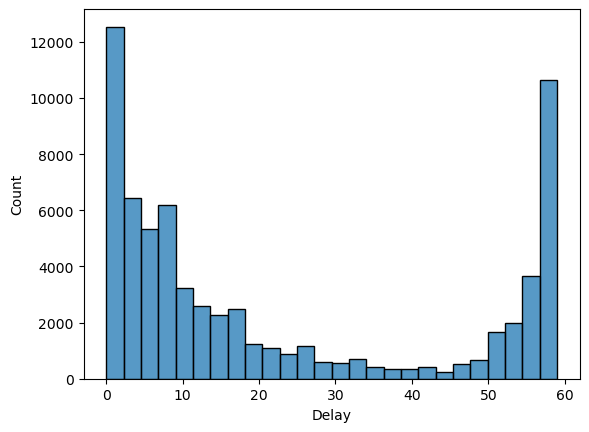

In [118]:
sn.histplot(data=dataset, x="Delay")

Como se explica en el readme del proyecto, en este caso se busca predecir la probablidad de atraso, es decir si ocurre un atraso o no. No se busca por ende predecir el atraso exacto en minutos. Se puede considerar como atraso si la diferencia entre el tiempo de operacion y programado es sobre 0 minutos o sobre un cierto rango. Se toma la decision de considerar un cierto rango, en especifico el que se obtuvo previamente (atraso menor equivalente a < 15 minutos). **Por lo tanto, es un atraso si se supera los 15 minutos de diferencia entre el tiempo programado y el de operacion.**
